In [1]:
import pandas as pd
import matplotlib.pyplot as plt
us_sales_data = pd.read_csv("US_Regional_Sales_Data.csv")
print(us_sales_data)

       OrderNumber Sales Channel WarehouseCode ProcuredDate OrderDate  \
0      SO - 000101      In-Store  WARE-UHY1004     31/12/17   31/5/18   
1      SO - 000102        Online  WARE-NMK1003     31/12/17   31/5/18   
2      SO - 000103   Distributor  WARE-UHY1004     31/12/17   31/5/18   
3      SO - 000104     Wholesale  WARE-NMK1003     31/12/17   31/5/18   
4      SO - 000105   Distributor  WARE-NMK1003      10/4/18   31/5/18   
...            ...           ...           ...          ...       ...   
7986  SO - 0008087      In-Store  WARE-MKL1006      26/9/20  30/12/20   
7987  SO - 0008088        Online  WARE-NMK1003      26/9/20  30/12/20   
7988  SO - 0008089        Online  WARE-UHY1004      26/9/20  30/12/20   
7989  SO - 0008090        Online  WARE-NMK1003      26/9/20  30/12/20   
7990  SO - 0008091      In-Store  WARE-UHY1004      26/9/20  30/12/20   

     ShipDate DeliveryDate CurrencyCode  _SalesTeamID  _CustomerID  _StoreID  \
0     14/6/18      19/6/18          USD    

In [2]:
print(us_sales_data.head())

   OrderNumber Sales Channel WarehouseCode ProcuredDate OrderDate ShipDate  \
0  SO - 000101      In-Store  WARE-UHY1004     31/12/17   31/5/18  14/6/18   
1  SO - 000102        Online  WARE-NMK1003     31/12/17   31/5/18  22/6/18   
2  SO - 000103   Distributor  WARE-UHY1004     31/12/17   31/5/18  21/6/18   
3  SO - 000104     Wholesale  WARE-NMK1003     31/12/17   31/5/18   2/6/18   
4  SO - 000105   Distributor  WARE-NMK1003      10/4/18   31/5/18  16/6/18   

  DeliveryDate CurrencyCode  _SalesTeamID  _CustomerID  _StoreID  _ProductID  \
0      19/6/18          USD             6           15       259          12   
1       2/7/18          USD            14           20       196          27   
2       1/7/18          USD            21           16       213          16   
3       7/6/18          USD            28           48       107          23   
4      26/6/18          USD            22           49       111          26   

   Order Quantity  Discount Applied Unit Cost Unit

In [3]:
columns = us_sales_data[["Discount Applied", "Unit Price", "Order Quantity"]]
print(columns.head())

   Discount Applied Unit Price  Order Quantity
0             0.075   1,963.10               5
1             0.075   3,939.60               3
2             0.050   1,775.50               1
3             0.075   2,324.90               8
4             0.100   1,822.40               8


In [4]:
us_sales_data['Unit Price'] = pd.to_numeric(us_sales_data['Unit Price'], errors='coerce') 
us_sales_data['Discount Applied'] = pd.to_numeric(us_sales_data['Discount Applied'], errors='coerce')
us_sales_data['Total Sales'] = us_sales_data['Order Quantity'] * us_sales_data['Unit Price'] * (1 - us_sales_data['Discount Applied'])
discount_sales = us_sales_data.groupby('Discount Applied')['Total Sales'].sum().reset_index()
print(discount_sales)

   Discount Applied  Total Sales
0             0.050  1309732.415
1             0.075   979576.850
2             0.100   741876.930
3             0.150   460828.010
4             0.200   280102.880
5             0.300   113202.530
6             0.400   105388.320


DATA TYPE CONVERSION:
1.	The code initiates the process of converting the data in the Unit Price and Discount Applied Columns of the data into numerical values.
2.	The code employs the pd.to_numeric function to achieve this objective. By configuring the 
‘errors’ parameter to ’coerce’, the code ensures that any non-numeric entries present in these columns are transformed into NaN values.

CALCULATION OF TOTAL SALES:
1.	In Code, a new column named ‘Total Sales’ is added to the Data. This new column is designed
to capture the cumulative sales value for each individual transaction.
2.	The total Sales are computed by taking the product of the ‘Order Quantity’ and the ‘Unit Price’, 
followed by deducting the discount represented by the ‘Discount Applied’ from 1.

GROUPING AND AGGREGATION:
1.	The code proceeds to group the data based on the ‘Discount Applied’ column. This operation groups rows with the same discount value together.
2.	For each unique discount value, it calculates the sum of ‘Total Sales’. This provides the total sales amount associated with each discount level.




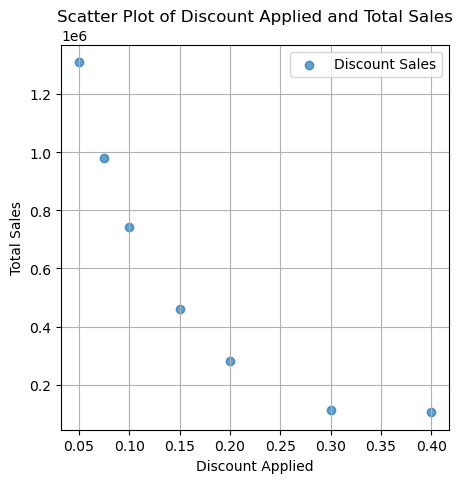

In [5]:
# Displaying the total sales for each discount level
plt.figure(figsize=(5,5))  
plt.scatter(discount_sales['Discount Applied'], discount_sales['Total Sales'], label='Discount Sales', alpha=0.7)

# Add labels and title
plt.xlabel('Discount Applied')
plt.ylabel('Total Sales')
plt.title('Scatter Plot of Discount Applied and Total Sales')
plt.legend()
plt.grid(True)
plt.show()

X-Axis: The "Discount Applied" represents the percentage of discounts applied.

Y-Axis: "Total Sales" indicates the total revenue generated, considering order quantity, unit price, and applied discounts.

Plot Description: The scatter plot clearly shows the relationship between discount levels and their impact on total sales. It allows you to identify any sales concerning discounts. For instance, you can observe whether there's a point of diminishing returns, where higher discounts result in reduced total sales.



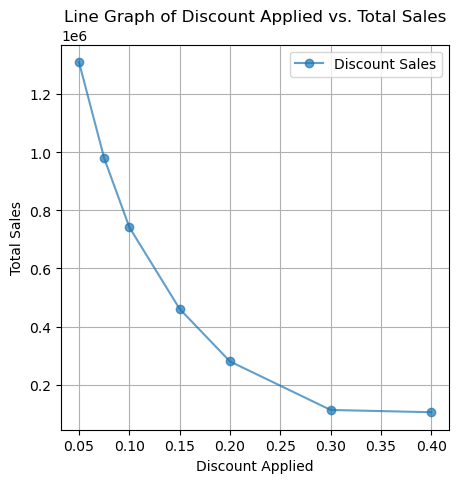

In [6]:
plt.figure(figsize=(5, 5))  

plt.plot(discount_sales['Discount Applied'], discount_sales['Total Sales'], marker='o', linestyle='-', label='Discount Sales', alpha=0.7)
plt.xlabel('Discount Applied')
plt.ylabel('Total Sales')
plt.title('Line Graph of Discount Applied vs. Total Sales')
plt.legend()
plt.grid(True)
plt.show()

X-Axis (Discount Applied): The X-axis represents the percentage of discounts applied, ranging from 0% (no discount) to a specific maximum discount level. Each point on the X-axis corresponds to a different discount level.

Y-Axis (Total Sales): The Y-axis represents the total sales revenue, which takes into account the order quantity, unit price, and applied discounts. It quantifies how much revenue is generated for each discount level.

Plot Description: Each point on the graph represents a specific discount level, and the 'Total Sales' associated with that discount level is connected by a line to the next point. This line depicts the trend in total sales as discounts increase.

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

columns = us_sales_data[["Discount Applied", "_ProductID"]]
print(columns.head())

   Discount Applied  _ProductID
0             0.075          12
1             0.075          27
2             0.050          16
3             0.075          23
4             0.100          26


In [8]:
columns = us_sales_data[["_ProductID", "Discount Applied"]]
average_discount_by_product = us_sales_data.groupby('_ProductID')['Discount Applied'].mean()

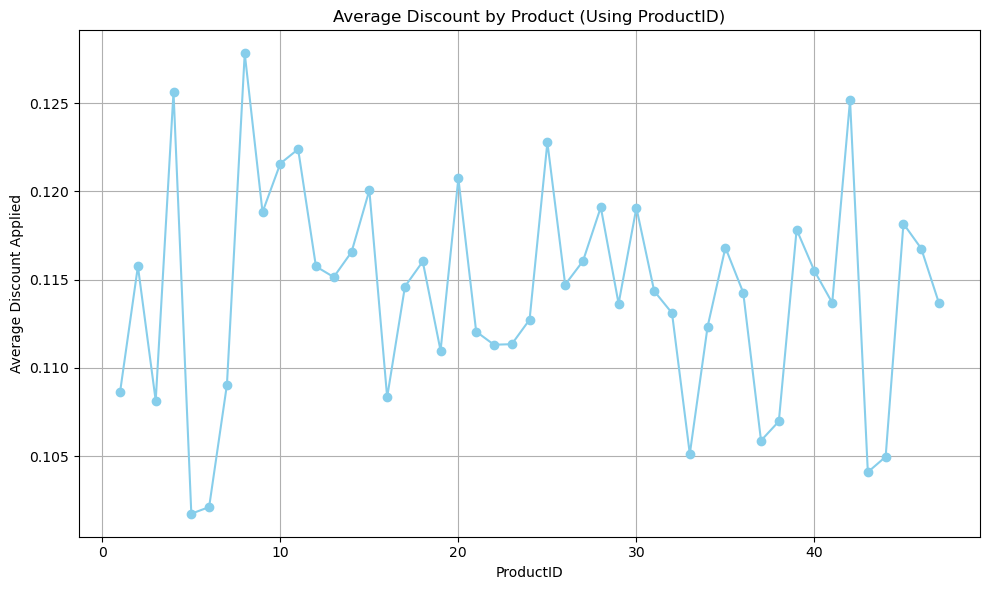

In [9]:
plt.figure(figsize=(10, 6))
average_discount_by_product.plot(kind='line', marker='o', color='skyblue')

plt.title('Average Discount by Product (Using ProductID)')
plt.xlabel('ProductID')
plt.ylabel('Average Discount Applied')
plt.grid(True)
plt.tight_layout()
plt.show()


X-Axis (ProductID): The X-axis represents the unique product IDs. Each point on the X-axis corresponds to a specific product.

Y-Axis (Average Discount Applied): The Y-axis represents the average discount applied to each product. It quantifies the average percentage discount given for each product.

Plot Description: The line graph visually displays the variations in average discounts for different products. It allows to compare and analyze the average discount levels across products. For instance, you can identify which products tend to have higher or lower average discounts. The graph provides insights into how discounts are distributed across the product catalog and may be useful for pricing and marketing strategies.

In [10]:
unique_dates = us_sales_data['_ProductID'].unique()

# Print the unique dates
for df in unique_dates:
    print(df)

12
27
16
23
26
1
5
46
47
13
38
40
39
32
6
25
3
20
24
33
35
15
36
37
14
7
17
2
34
11
8
44
22
4
45
21
10
28
29
18
30
31
43
9
41
19
42


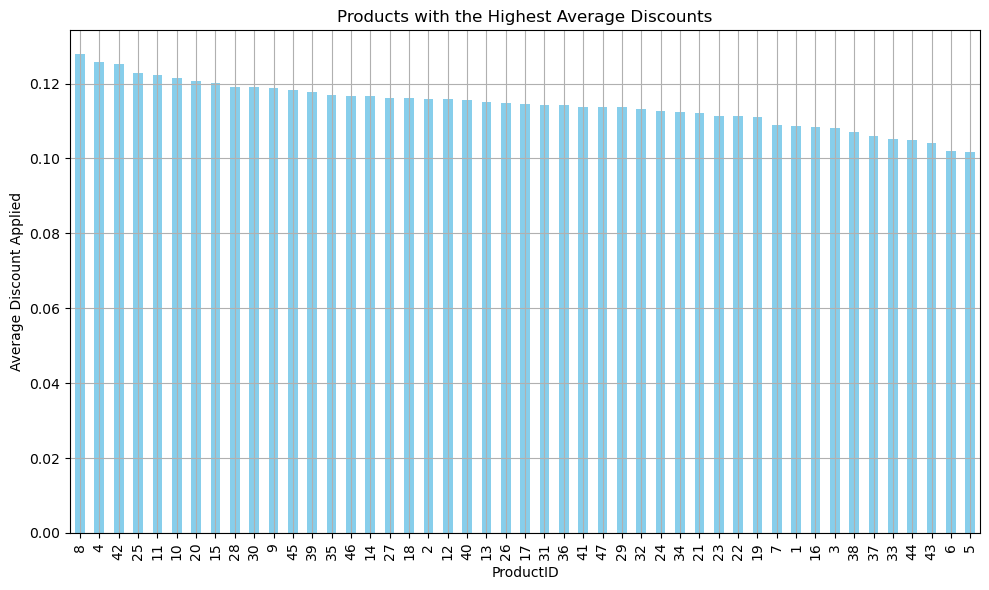

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

columns = us_sales_data[["Discount Applied", "_ProductID"]]



average_discount_by_product = us_sales_data.groupby('_ProductID')['Discount Applied'].mean()

sorted_products = average_discount_by_product.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sorted_products.plot(kind='bar', color='skyblue')

plt.title('Products with the Highest Average Discounts')
plt.xlabel('ProductID')
plt.ylabel('Average Discount Applied')

plt.grid(True)
plt.tight_layout()
plt.show()


X-Axis (ProductID): The X-axis represents the unique product IDs that have the highest average discounts. Each bar corresponds to a specific product, and products are sorted in descending order of their average discounts.

Y-Axis (Average Discount Applied): The Y-axis represents the average discount applied to each product. It quantifies the average percentage discount given for the selected products.

Plot Description: The bar chart provides a clear visual representation of which products receive the highest average discounts. It allows you to identify and focus on products that might be subject to the most significant discounting strategies.

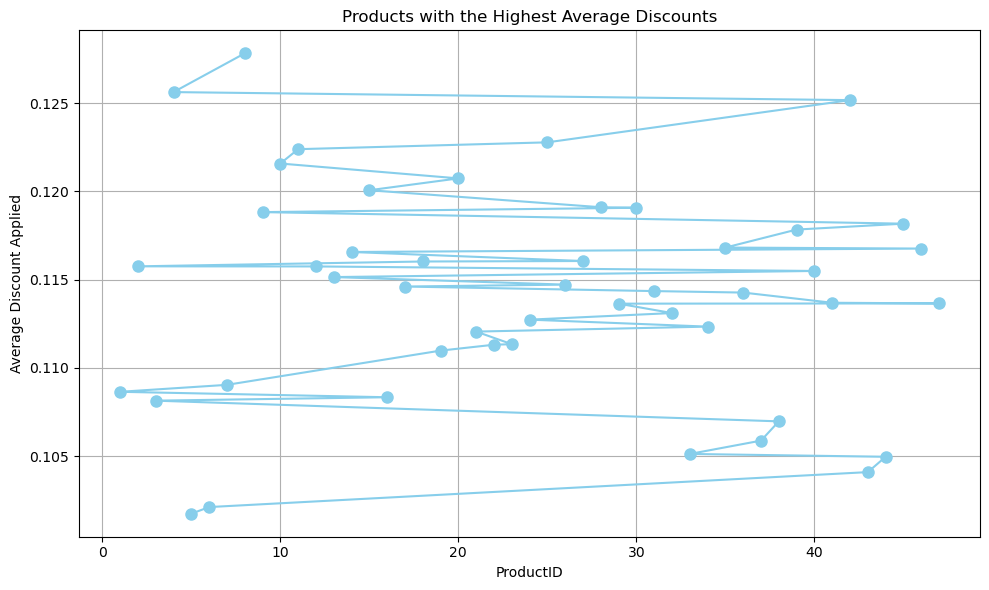

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

columns = us_sales_data[["Discount Applied", "_ProductID"]]
average_discount_by_product = us_sales_data.groupby('_ProductID')['Discount Applied'].mean()
sorted_products = average_discount_by_product.sort_values(ascending=False)
plt.figure(figsize=(10, 6))
plt.plot(sorted_products.index, sorted_products.values, marker='o', color='skyblue', linestyle='-', markersize=8)
plt.title('Products with the Highest Average Discounts')
plt.xlabel('ProductID')
plt.ylabel('Average Discount Applied')
plt.grid(True)
plt.tight_layout()
plt.show()


X-Axis (ProductID): The X-axis represents the unique product IDs that have the highest average discounts. Each point on the X-axis corresponds to a specific product, and they are sorted in descending order based on their average discounts.

Y-Axis (Average Discount Applied): The Y-axis represents the average discount applied to each product. It quantifies the average percentage discount given for the selected products.

Plot Description: The line plot allows you to observe the trend in average discounts for different products. The solid line connects the average discount values for each product, making it easy to identify the products with the highest discounts

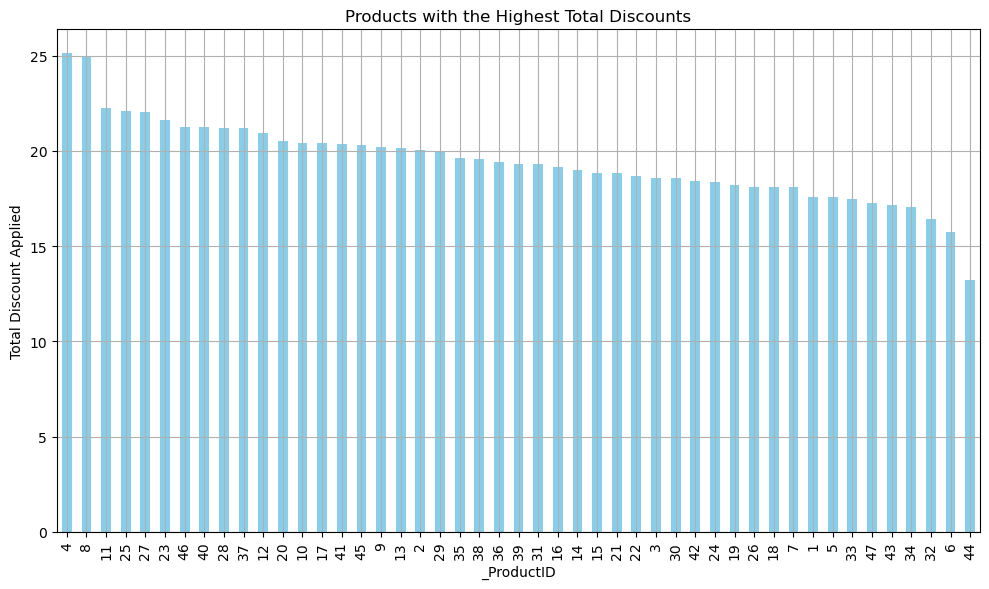

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

columns = us_sales_data[["Discount Applied", "_ProductID"]]
total_discount_by_product = us_sales_data.groupby('_ProductID')['Discount Applied'].sum()
sorted_products = total_discount_by_product.sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sorted_products.plot(kind='bar', color='skyblue')
plt.title('Products with the Highest Total Discounts')
plt.xlabel('_ProductID')
plt.ylabel('Total Discount Applied')
plt.grid(True)
plt.tight_layout()
plt.show()


This bar chart provides a clear visual representation of the products with the highest total discounts applied. It allows you to quickly identify and compare the products that have received the most substantial discounts. The height of each bar represents the total discount applied to a specific product, making it easy to spot the products with the highest discounts. This information can be valuable for analyzing discount strategies, pricing, and marketing decisions related to these products

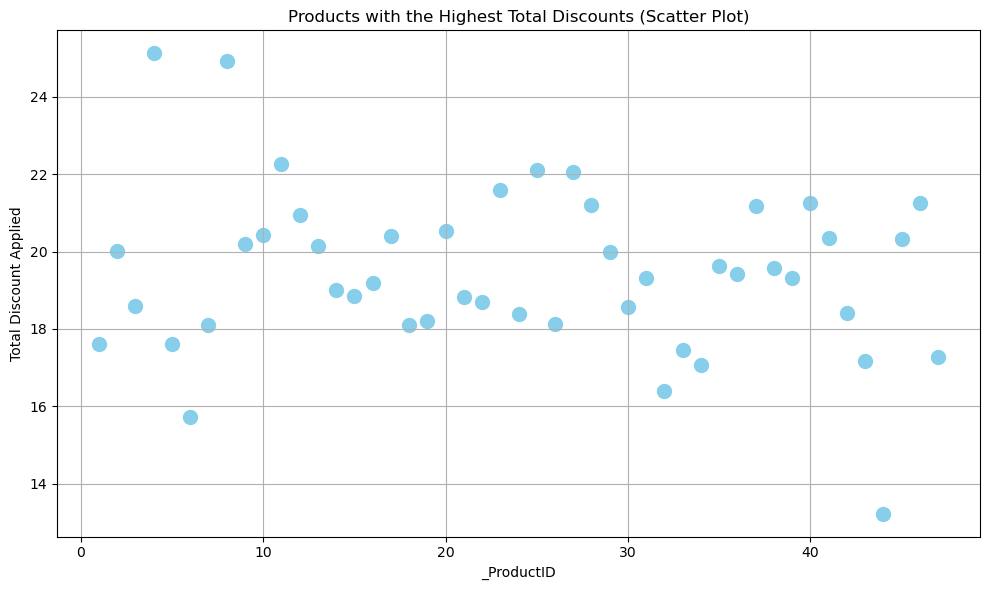

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

columns = us_sales_data[["Discount Applied", "_ProductID"]]
total_discount_by_product = us_sales_data.groupby('_ProductID')['Discount Applied'].sum()
sorted_products = total_discount_by_product.sort_values(ascending=False)
plt.figure(figsize=(10, 6))
plt.scatter(sorted_products.index, sorted_products.values, color='skyblue', s=100)
plt.title('Products with the Highest Total Discounts (Scatter Plot)')
plt.xlabel('_ProductID')
plt.ylabel('Total Discount Applied')
plt.grid(True)
plt.tight_layout()
plt.show()


X-Axis (ProductID): The X-axis represents the unique product IDs that have received the highest total discounts. Each data point corresponds to a specific product, and they are placed along the X-axis based on the product IDs.

Y-Axis (Total Discount Applied): The Y-axis represents the total discount applied to each product. The position along the Y-axis corresponds to the total discount for each product.

Plot Description: The scatter plot visually depicts the total discounts applied to different products. Each data point in the plot represents a product, and its position on the plot conveys the magnitude of the total discount applied to that product. This allows you to quickly identify products with the highest total discounts and assess their significance in your sales data analysis.